**SVM Multiclass Classification.**

SVM does not support multiclass classification natively. Two commonly used approaches that extend SVM for multiclass classification are One-vs-One and One-vs-Rest. In this exercise, we would like you to apply multiclass classification using SVM to classify number 0-10 from MNIST dataset. 
 
Specifically, we would like you to explore the following: 

1. **Q1. [5 scores] Select samples & show distribution:** you may randomly select 6000 samples for training and 1000 sample for testing. Ensure that you have chosen the samples evenly from each class. Then, show us the distribution of labels in the selected training and testing samples.

2. **Q2. [10 scores] Training & model selection:** let's assume that we choose the RBF kernel for SVM. You may separate your training set for tuning and validation. Please show the following results:   
*   a. Show the accuracy (or loss ) curves across of the validation set across different kernels and model parameters. 
*   b. Pick the best set of parameters and verify the final performance on the testing dataset.  

3. **Q3. [25 scores] One-vs-one and One-vs-the rest SVM:** to see the differences between One-vs-one and One-vs-the rest. Let’s observe the positive and negative supports.  
*   a. For one-vs-one classification, what is the number of binary classifiers and how is it related to the number of classes? 
    - Observe the positive and negative supports of the first separation, the last separation, and any where in the middle.
*   b. For one-vs-rest classification, same question for the binary classifiers and number of classes. 
    - Also, observe the positive and negative supports of the first separation,  the last separation, and any where inbetween.
    
*   c. Can you tell the differences between the observation in (3.a) and (3.b)? 
    - For each observation, you may plot the mean shapes of the positive and negative supports & the histogram of the labels associated with the positive and negative supports.

*   d. What are the values contained in 'svm.dual_coef_'? Why don't they contain only positive value? 


---

**Note.**

To get the full score, you should be able to provide the following plots with resonable results and **with good explaination**:

1. SVM_1_MNIST_label_distribution.png  **[5 scores]**  
2. SVM_2_ModelSelection.png **[5 scores]** +  your answers **[5 scores]**
3. Two sets for one_vs_one plots **[10 scores]**  and one_vs_rest_0/8/x plots **[10 scores]** and your answers **[5 scores]**. The examples of the plot files are as follows: 

  - SVM_3_mean_positive_support_one_vs_one_0.png
  - SVM_3_mean_positive_support_one_vs_one_8.png
  - SVM_3_mean_positive_support_one_vs_one_x.png
  - SVM_3_mean_negative_support_one_vs_one_0.png
  - SVM_3_mean_negative_support_one_vs_one_8.png
  - SVM_3_mean_negative_support_one_vs_one_x.png

  - SVM_3_MNIST_neg_pos_distribution_one_vs_one_0.png
  - SVM_3_MNIST_neg_pos_distribution_one_vs_one_8.png
  - SVM_3_MNIST_neg_pos_distribution_one_vs_one_x.png

  - SVM_3_positive_support_one_vs_one_0.png
  - SVM_3_positive_support_one_vs_one_8.png
  - SVM_3_positive_support_one_vs_one_x.png

  - SVM_3_negative_support_one_vs_one_0.png
  - SVM_3_negative_support_one_vs_one_8.png
  - SVM_3_negative_support_one_vs_one_x.png

-------------------------------------------------------


**Installation Note.**
In Anaconda shellscript, you may use the following procedure:

1. Install conda environment.

``` $ conda env create -f environments.yml ```

2. Activate conda environment.

``` $ conda activate mysvm ```

3. Install ipykernel 

``` $ conda install -c anaconda ipykernel ```

4. Install kernel environment 

``` $ python -m ipykernel install --user --name=mysvm```

5. Open Jupyter Notebook. Then, select the environment that you installed (e.g., mysvm)

```$ jupyter notebook ```

--------------------------------------------------------------------------------------------------


###   Q.1 [5 scores] Select samples & show distribution  
* a. You may randomly select 6000 samples for training and 1000 sample for testing. 
* b. Show us the distribution of labels in the selected training and testing sets to show that the samples have been chosen evenly. 

In [1]:
def random_sampling_data(samples, labels, max_num, sel_num):
    seq = np.random.randint(0,max_num,sel_num)   
    ### BEGIN SOLUTION
    selected_samples  = samples[seq,:,:].reshape(-1,28*28) 
    selected_labels   = labels[seq] 
    ### END SOLUTION
    return selected_samples, selected_labels

In [2]:
def histogram(labels, range_list = [0,10]):
    ### BEGIN SOLUTION
    hist, bins = np.histogram(labels, range=range_list)
    ### END SOLUTION
    return hist 

In [3]:
!pip install torchvision
!pip install functorch 

100.0%


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw



100.0%


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



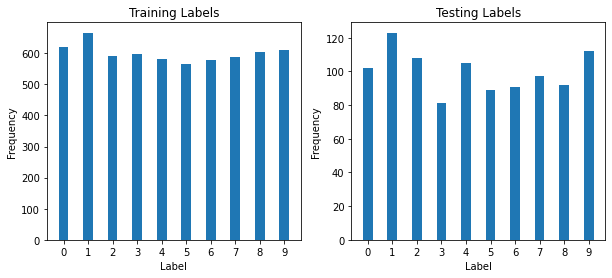

In [4]:
from scipy.stats import mode
import numpy as np
#from mnist import MNIST
from time import time
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib 
 
from itertools import chain
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
 
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
import pandas as pd
import torchvision.datasets as datasets   

# Load the MNIST dataset

mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

train_images = mnist_trainset.data.numpy()
train_labels = mnist_trainset.targets.numpy()
 
test_images = mnist_testset.data.numpy()
test_labels = mnist_testset.targets.numpy()
 
max_num_training = 60000
sel_num_training =  6000
max_num_testing = 10000
sel_num_testing =  1000

# 1.1 Sample the data and reshape it into a 2D array (3 scores)
train_samp, trlab_samp = random_sampling_data(train_images, train_labels, max_num_training, sel_num_training) # <<<<<<<<<<<<<<<<<<< 
test_samp, tslab_samp  = random_sampling_data(test_images, test_labels, max_num_testing, sel_num_testing)     # <<<<<<<<<<<<<<<<<<< 

''' Question 1.1 - random choosing the right number'''

assert train_samp.shape[0] == sel_num_training 
assert trlab_samp.shape[0] == sel_num_training

assert test_samp.shape[0]  == sel_num_testing
assert tslab_samp.shape[0] == sel_num_testing

# 1.2 Show the distribution of the training and testing labels (2 scores)
# [Hint] You may use `np.histogram(trlab_samp, range=[0,10])`
# to get the histogram of the training labels.
num_class = 10

train_hist = histogram(trlab_samp, range_list = [0,num_class]) # <<<<<<<<<<<<<<<<<<< 
test_hist  = histogram(tslab_samp, range_list = [0,num_class])  # <<<<<<<<<<<<<<<<<<<

''' Question 1.2 - get the right histogram'''
assert train_hist.shape[0] == num_class 
assert test_hist.shape[0]  == num_class 

ticks = range(10) 
width = 0.4
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 
ax = axes[0]
ax.bar(ticks, train_hist, width, label='Training')  
ax.set_xticks(ticks)
ax.set_ylabel('Frequency')
ax.set_xlabel('Label')
ax.set_title('Training Labels')
 
ax = axes[1] 
ax.bar(ticks, test_hist, width, label='Testing')  
ax.set_xticks(ticks)
ax.set_ylabel('Frequency')
ax.set_xlabel('Label')
ax.set_title('Testing Labels')  
fig.savefig("SVM_1_MNIST_label_distribution.png")

###  Q.2 [10 scores] Training & model Selection
Let's assume that we choose the RBF kernel for SVM. You may separate your training set for tuning and validation. Please show the following results:

* a. [5 scores] Write the code to perform grid searching using the accuracy (or loss ) on the validation as well as training sets in validating the best choice of the parameters. 

* b. [5 scores] Pick the best set of parameters and verify the final performance on the testing dataset. This can be done by showing the accuracy (or loss ) curves across of the validation set across different kernels and model parameters.

<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

#### 2a. [5 scores] Write the code to perform grid searching. 
This can be done by using the accuracy (or loss ) on the validation as well as training sets in validating the best choice of the parameters. 

In [5]:
def grid_search_param(sub_train_samp, sub_trlab_samp, val_samp, valab_sam, c_list, g_list):
    
    ### BEGIN SOLUTION  
    c_list = c_list #   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
    g_list = g_list #   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  
    
    tuning_ = [] 
    for c in c_list:  
        for g in g_list:  
            svm = SVC(kernel='rbf', C=c, gamma=g)                      # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  
            # perform grid search with 5-fold cross-validation
            # Fit the estimator to the data
            svm.fit(sub_train_samp, sub_trlab_samp)                            # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  

            # Compute the decision function on the training data
            accuracy_train = svm.score(sub_train_samp, sub_trlab_samp) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
            accuracy_val   = svm.score(val_samp, valab_sam)             # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 

            # Alternatively, compute the hinge loss on the training data
            decision_values = svm.decision_function(sub_train_samp)   # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
            h_loss = hinge_loss(sub_trlab_samp, decision_values)

            decision_values_test = svm.decision_function(val_samp)    # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
            v_loss               = hinge_loss(valab_sam, decision_values_test)  
    
    
            
            tuning_.append({"C":c, "gamma":g,  "Train": h_loss, "Val":v_loss, 'ACC_tra' : accuracy_train, 'ACC_val' : accuracy_val })
            print({"C":c, "gamma":g,  "Train": h_loss, "Val":v_loss, 'ACC_tra' : accuracy_train, 'ACC_val' : accuracy_val })
    
    df_tuning = pd.DataFrame(tuning_)
    
    return df_tuning
    
    ### END SOLUTION  
    

In [6]:

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import hinge_loss


c_list  = [0.01, 0.1, 0.5, 1.0, 2.0, 2.5] 
g_list =  [1.0] 

param_grid = {'C': c_list, 'gamma':  g_list}


###################### Perform Grid Searching ##########################
sub_train_samp, val_samp, sub_trlab_samp, valab_sam = train_test_split(train_samp, trlab_samp, test_size=0.2) 
df_tuning = grid_search_param(sub_train_samp, sub_trlab_samp, val_samp, valab_sam, c_list, g_list) 
 

{'C': 0.01, 'gamma': 1.0, 'Train': 5.408900357496924, 'Val': 5.500684939982192, 'ACC_tra': 0.10791666666666666, 'ACC_val': 0.12333333333333334}
{'C': 0.1, 'gamma': 1.0, 'Train': 5.38300100295868, 'Val': 5.497813305826186, 'ACC_tra': 0.10791666666666666, 'ACC_val': 0.12333333333333334}
{'C': 0.5, 'gamma': 1.0, 'Train': 1.9177308590184077, 'Val': 5.274538803342568, 'ACC_tra': 0.18125, 'ACC_val': 0.12416666666666666}
{'C': 1.0, 'gamma': 1.0, 'Train': 0.0, 'Val': 4.95519036769172, 'ACC_tra': 1.0, 'ACC_val': 0.1875}
{'C': 2.0, 'gamma': 1.0, 'Train': 0.0, 'Val': 4.910810373974876, 'ACC_tra': 1.0, 'ACC_val': 0.1875}
{'C': 2.5, 'gamma': 1.0, 'Train': 0.0, 'Val': 4.910810373974876, 'ACC_tra': 1.0, 'ACC_val': 0.1875}


####  2b. [5 scores] Pick the best set of parameters and verify the final performance on the testing dataset. 
This can be done by showing the  accuracy (or loss ) curves across of the validation set across different kernels and model parameters. 
Here is just an example .... 
```
training_acc   = df_tuning['Train']
validating_acc = df_tuning['Val'] 
 
fig = plt.figure(figsize=(5,5)) 
# Plot the training and validation loss across different parameter settings. 
# Example result
plt.plot(c_list, training_acc, label='training',color='blue', linewidth=2.0)  
plt.plot(c_list, validating_acc, label='validate',color='red', linewidth=2.0) 
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.xlabel("C parameters") 
plt.legend()
plt.ylabel("Loss") 

fig.savefig("SVM_2_ModelSelection.png")


# From the above plot, please add a cell to describe why you choose the following number for best_c and best_gamma.

best_c     =  100 # <<<<<<<<<<<<<<<<<<<<<<< Please change the number to the best C you found in the previous step
best_g     =  100 # <<<<<<<<<<<<<<<<<<<<<<< Please change the number to the best gamma you found in the previous step 
```
 
[Hint] You can also recheck your result with the following GridSearchCV. For example .... 
```
# Create a GridSearchCV object with the SVM model, hyperparameters, and custom scoring function
svc = SVC(kernel='rbf')
grid_search = GridSearchCV(svc, param_grid=param_grid, cv=5, return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_search.fit(train_samp, trlab_samp)

# Get the best hyperparameters and associated training and validation losses
best_params = grid_search.best_params_ 
C = best_params['C']
gamma = best_params['gamma']
```
 
ADD A NEW CELL FOR YOUR CODE & ANSWER

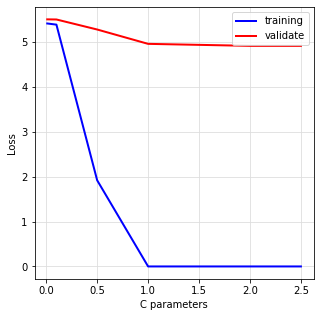

In [7]:
training_acc   = df_tuning['Train']
validating_acc = df_tuning['Val'] 
 
fig = plt.figure(figsize=(5,5)) 
# Plot the training and validation loss across different parameter settings. 
# Example result
plt.plot(c_list, training_acc, label='training',color='blue', linewidth=2.0)  
plt.plot(c_list, validating_acc, label='validate',color='red', linewidth=2.0) 
plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
plt.xlabel("C parameters") 
plt.legend()
plt.ylabel("Loss") 
plt.show()
fig.savefig("SVM_2_ModelSelection.png")

best_c     =  1  # <<<<<<<<<<<<<<<<<<<<<<< Please change the number to the best C you found in the previous step
best_g     =  1  # <<<<<<<<<<<<<<<<<<<<<<< Please change the number to the best gamma you found in the previous step 

### Q.3 [25 scores]   One-vs-one and One-vs-rest SVM
#### Instruction
*    a. For one-vs-one classification, what is the number of binary classifiers and how is it related to the number of classes? 
         - Observe the positive and negative supports of the first separation, the last separation, and any where in the middle.
*    b. For one-vs-rest classification, same question for the number of classifiers and classes. 
         - Also, observe the positive and negative supports of the first separation,  the last separation, and any where inbetween.
*    c. Can you tell the differences between the observation in (3.a) and (3.b)? 
     - For each observation, you may plot the mean shapes of the positive and negative supports & the histogram of 
       the labels associated with the positive and negative supports.

####[5 scores] 3.3 Calculate the histogram of the labels of the positive and negative supports Scoring  
 
*   [10 Scores] 3.1 svm_multiclass CODING [10 Scores] 
*   [5 Scores]  3.2 get_supoorts CODING 
*   [5 scores] 3.3 Calculate the histogram of the labels of the positive and negative supports

*   [5 scores] 3.4 Answer the following questions:
     a. one-vs-rest classification, what is the number of binary classifiers and how is it related to the number of classes? 
     b. one-vs-one classification, what is the number of binary classifiers and how is it related to the number of classes? 
     c. Can you tell the differences between the observation in (3.a) and (3.b)? 
     d. Explain what are the values stored in dual_coef



<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 

##### [10 Scores] 3.1 svm_multiclass CODING [10 Scores]

In [8]:
def svm_multiclass(train_samp, trlab_samp, best_c, best_g, type_svm = "one_vs_one"):
    # Define an SVM object (one vs one)  with the best parameters obtained from Q2
    # [Hint!] svm = SVC(kernel='XXX')
    
    ### BEGIN SOLUTION 
    if type_svm == "one_vs_one":
    
        # Define an SVM object (one vs one)  with the best parameters obtained from Q2  
        # [Hint!] svm = SVC(kernel='XXX') <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  
        svm = SVC(kernel='rbf', C=best_c, gamma=best_g)   
        # Train One vs One [SVM model with RBF kernel]
        svm.fit(train_samp, trlab_samp)    
        
    elif type_svm == "one_vs_rest":

        # Define an SVM object (one vs rest) with the best parameters obtained from Q2
        # [Hint!] svm = SVC(kernel='XXX')  <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<   
        svm = SVC(kernel='rbf', C=best_c, gamma=best_g) # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< 
        svm = OneVsRestClassifier(svm)                  # <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<   
        # Train One vs Rest [SVM model with RBF kernel]
        svm.fit(train_samp, trlab_samp)   
    return svm
    ### END SOLUTION   

In [9]:
type_svm =  "one_vs_one"  # <<<<<<<<<<<<   Please change the type of SVM you want to use. You can choose either "one_vs_one" or "one_vs_rest"

best_c     =  1.0 # <<<<<<<<<<<<<<<<<<<<<<<   Please change the number to the best C you found in the previous step
best_g     =  1.0 # <<<<<<<<<<<<<<<<<<<<<<<   Please change the number to the best C you found in the previous step

if type_svm == "one_vs_one":
    
    svm = svm_multiclass(train_samp, trlab_samp, best_c, best_g, type_svm = "one_vs_one")
    dual_coef = svm.dual_coef_ 
    support   = svm.support_

    print("Number of  binary classifiers: %d"   % dual_coef.shape[0]) 
    print("Number of  Support Coefficients: %d" % dual_coef.shape[1])

    class_i =  1 # 0, 8, 3  <<<<<<<<   Try the first separation, the last separation, and any where inbetween ...by changing `class_i = 0,1,..9` .
    separate_i    = class_i
    pos_support = support[dual_coef[separate_i,:] > 0]
    neg_support = support[dual_coef[separate_i,:] < 0]

elif type_svm == "one_vs_rest": 
  
    svm = svm_multiclass(train_samp, trlab_samp, best_c, best_g, type_svm = "one_vs_rest")
    
    class_i = 9  # 0, 9, 3 <<<<<<<<<<<<   Try the first separation,  the last separation, and any where inbetween .. by changing `class_i = 0,1,..9` .

    # Get binary classifiers for each class
    binary_clf = svm.estimators_[class_i] 
    # get the dual coefficients for class_i
    dual_coef = binary_clf.dual_coef_
    support   = binary_clf.support_

    print("Number of  binary classifiers: %d" % len(ovr_svc.estimators_))
    print("Number of  Support Coefficients: %d" % dual_coef.shape[1])

    pos_support = support[dual_coef[0,:] > 0]
    neg_support = support[dual_coef[0,:] < 0]


print(f"Number of supports for positive class: {len(pos_support)}")
print(f"Number of supports for negative class: {len(neg_support)}")

Number of  binary classifiers: 9
Number of  Support Coefficients: 5973
Number of supports for positive class: 1219
Number of supports for negative class: 4709


##### [5 Scores] 3.2 get_supoorts CODING

In [14]:
def get_supoorts(train_samp, trlab_samp, support):
    # [Hint!] supp_samples    = train_samp[XXX]   # 
    #         supp_labels     = trlab_samp[XXX]
    
    ### BEGIN SOLUTION
    supp_samples = train_samp[support,:]
    supp_labels  = trlab_samp[support]
    ### END SOLUTION
    
    return supp_samples, supp_labels

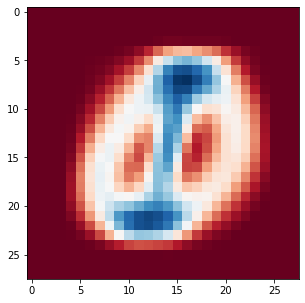

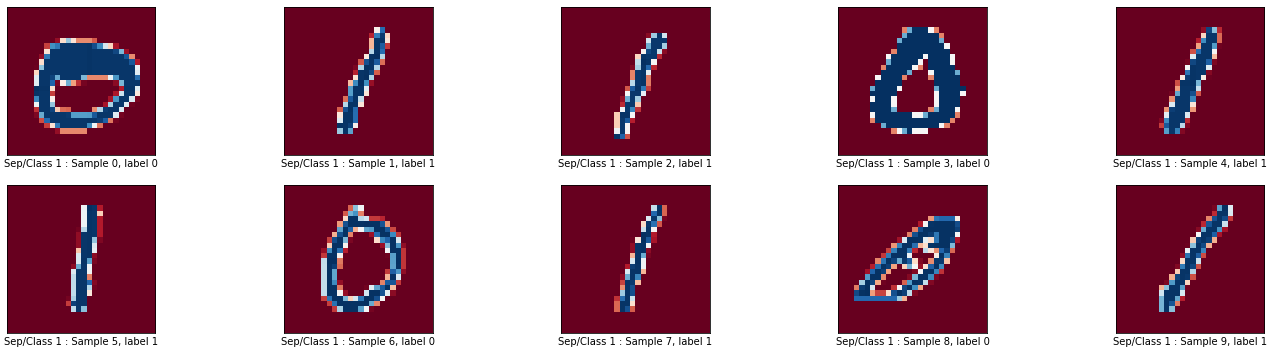

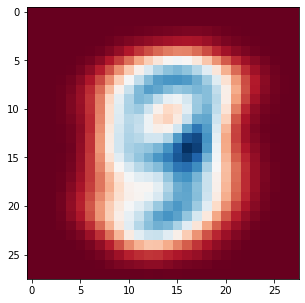

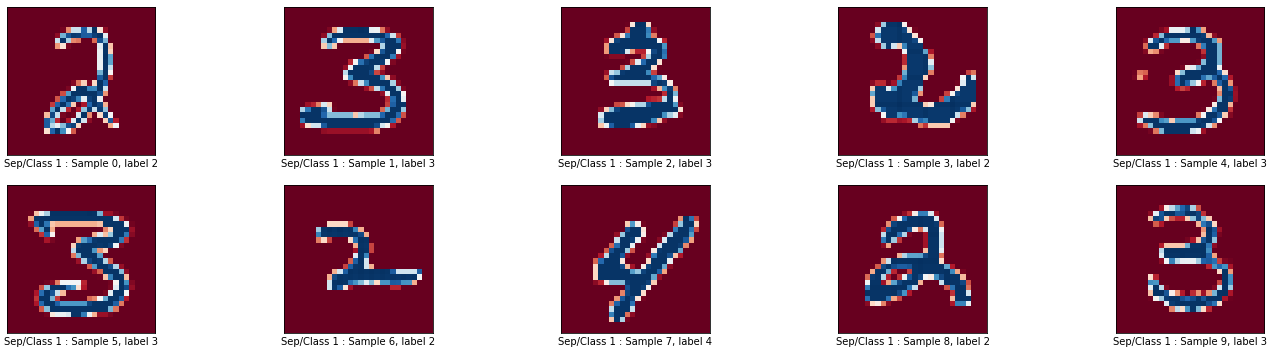

In [15]:
# You may use the codes in the following cells to observe the positive and negative samples of the first separation, 
# the last separation, and any where inbetween by changing `class_i = 0,1,..9` above. 
# You can plot all of them if needed. 
#
# In this task, you have to select the positive/negative supports from training samples and lebels.  
# So, please correct the following codes to extract the info from training samples and lebels:
#
# [Hint] Use `pos_support` to find the positive supports from the traing samples, i.e, train_samp, or from svm.support_vectors_
#        Use `neg_support` to find the negative supports from the traing samples. 
# 
# def get_supoorts(train_samp, trlab_samp, support): 
 
pos_supp_samples, label_pos = get_supoorts(train_samp, trlab_samp, pos_support) # <<<<  Q.3.A,B,C
neg_supp_samples, label_neg = get_supoorts(train_samp, trlab_samp,neg_support) # <<<<  Q.3.A,B,C 


# Plot mean positive support 
av_train = pos_supp_samples.mean(axis=0).reshape(-1, 28, 28) 
fig = plt.figure(figsize=(5,5))
plt.imshow(av_train.reshape(28, 28), cmap=plt.cm.RdBu)
fig.savefig("SVM_3_mean_positive_support_%s_%d.png" % (type_svm,class_i))

show_support = min(len(pos_support),len(neg_support))  
chosen_sample = np.random.randint(0, show_support,10)

# Plot the positive samples 
ind = 0
fig = plt.figure(figsize=(24,6))

for i, sample_id in enumerate(chosen_sample):
    l1 = plt.subplot(int(len(chosen_sample)/5), 5, i + 1)  
    sv_image = pos_supp_samples[sample_id,:]
    sv_label = label_pos[sample_id]
    l1.imshow(sv_image.reshape(28, 28), cmap=plt.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Sep/Class %d : Sample %d, label %s' % (class_i, i, str(sv_label))) 

fig.savefig("SVM_3_positive_support_%s_%d.png" % (type_svm,class_i))


# Plot mean negative support 
av_train = neg_supp_samples.mean(axis=0).reshape(-1, 28, 28) 
fig = plt.figure(figsize=(5,5))
plt.imshow(av_train.reshape(28, 28), cmap=plt.cm.RdBu)
fig.savefig("SVM_3_mean_negative_support_%s_%d.png" % (type_svm,class_i))
 
# Plot the negative samples 
ind = 0
fig = plt.figure(figsize=(24,6))
for i, sample_id in enumerate(chosen_sample):
    l1 = plt.subplot(int(len(chosen_sample)/5), 5, i + 1)   
    sv_image = neg_supp_samples[sample_id,:]
    sv_label = label_neg[sample_id]
    l1.imshow(sv_image.reshape(28, 28), cmap=plt.cm.RdBu)
    l1.set_xticks(())
    l1.set_yticks(())
    l1.set_xlabel('Sep/Class %d : Sample %d, label %s' % (class_i, i, str(sv_label)))  
fig.savefig("SVM_3_negative_support_%s_%d.png" % (type_svm,class_i))



#### [5 scores] 3.3 Calculate the histogram of the labels of the positive and negative supports

Then, plot the results... [Hint!] You can follow the example above in Q1.

```
pos_hist = histogram(xxx, range=xxx) 
neg_hist = histogram(xxx, range=xxx)
```
Then, plot the results with the following script:
```
width = 0.8
ticks = np.arange(10)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 

ax = axes[0]
ax.bar(range(10), pos_hist, width )
...
 
ax = axes[1] 
ax.bar(range(10), neg_hist, width )
... 

fig.savefig("SVM_3_MNIST_neg_pos_distribution_%s_%d.png" % (type_svm,class_i))
```

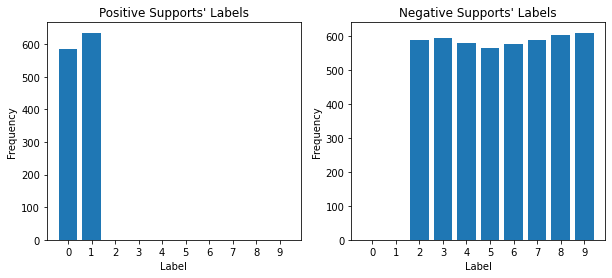

In [16]:
 
pos_hist = histogram(label_pos, range_list=[0,10]) 
neg_hist = histogram(label_neg, range_list=[0,10])
 
# Then, plot the results with the following script: 
width = 0.8
ticks = np.arange(10)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4)) 

ax = axes[0]
ax.bar(range(10), pos_hist, width )
ax.set_xticks(ticks)
ax.set_ylabel('Frequency')
ax.set_xlabel('Label')
ax.set_title("Positive Supports' Labels")
 
ax = axes[1] 
ax.bar(range(10), neg_hist, width )
ax.set_xticks(ticks)
ax.set_ylabel('Frequency')
ax.set_xlabel('Label')
ax.set_title("Negative Supports' Labels")
plt.show() 

fig.savefig("SVM_3_MNIST_neg_pos_distribution_%s_%d.png" % (type_svm,class_i))

#### [5 scores] 3.4 Answer the following questions: 

*    a. How many binary classifiers ? and how is it related to the number of classe for `type_svm == "one_vs_rest"` ? Why do you think it is the case?  (1 scores)


---------------------------------------------------

**Answer:** The number of binary classifiers is equal to the number of classes. Then the number of boundary decision is k. That is, they use the hyperplane to separate one class from the others.

---------------------------------------------------

*    b. How many binary classifiers ? and how is it related to the number of classe for `type_svm == "one_vs_one"` ? Why do you think it is the case?   (1 scores)

---------------------------------------------------

**Answer:** Theoretically, the number of boundary decisions for One-vs-One is equal to the total number of possible pairwise combinations between classes (k choose 2), i.e., k*(k-1)/2 = 10*(10-1)/2=5*9=45 for k is the number of classes. 

However, non-linear SVM from Sklearn uses k-1 binary classifiers that separate a set of classes into positive and negative groups based on the presence or absence of each class in the subsets.  For example, if there are 5 classes for {A,B,C,D,E}, it will classify them ({A}, {B,C,D,E}), ({A,B,C,D}, {E}) , ({A,B}, {C,D,E}) , ({A,B,C}, {D,E}).  Finally, the multiclass classification result is the intersection of positive and negative group. Therefore, it uses only k-1 binary classifiers. 

We can observe this by selecting each binary classifier and show the negative and positive supports. 

---------------------------------------------------

*    c. Can you tell the differences between the observation in (3.a) and (3.b)?  (1 scores)

---------------------------------------------------

**Answer:** The difference lies on how the boundary decision is made. For One-vs-rest, the decision is made between one class vs. the rest.  Also, we can see that the positive support will always corresponding to the class of interest. Meanwhile, for One-vs-One, classification is done between pair of classes. In this example, the multiclass classification result is the intersection of positive and negative group.   

---------------------------------------------------

*    d.1 Explain what are the values stored in `dual_coef` (you can explain with a formulation...e.g., is it a vector...and what is the coefficient of this vector)...? (1 score)
*    d.2 Why the value stored in `dual_coef` can be a negative value ?  (1 score) 

---------------------------------------------------

**Answer:** d.1 It is the vector where each of its coefficients is [$y_i \alpha_i$] 
            d.2 y_i is the class label that can take a value of -1 or 1.
            
---------------------------------------------------